In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import joblib

import scipy
import scipy.stats
from numpy import mean, square, sqrt
from scipy.stats import kurtosis
from scipy.stats import skew
from collections import Counter
from scipy.stats import kurtosis
from scipy.stats import skew
import random
import math as m
import warnings
warnings.filterwarnings('ignore')
from time import time
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-notebook')

In [2]:
pump_arr= [
    '03_08/VIB_0308_pump_51200.csv',
    '03_10/VIB_0310_pump_51200.csv',
    '03_11/VIB_0311_pump_51200.csv',
    '03_14/VIB_0314_pump_51200.csv',
    '03_16/VIB_0316_pump_51200.csv',
    '03_17/VIB_0317_pump_51200.csv',
    '03_21/VIB_0321_pump_51200.csv',
    '03_23/VIB_0323_pump_51200.csv',
    '03_24/VIB_0324_pump_51200.csv',
    '03_28/VIB_0328_pump_51200.csv'
]

In [3]:
def extract_feature(Hss):
    
    s, size = Hss.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.mean(Hss[:, i])  #compute mean for each signal
        a.append(x)  #store the value to empty array

    Mean_H = np.array(a) #convert list to array
    Mean_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.max(Hss[:, i])  #compute max for each signal
        a.append(x)  #store the value to empty array

    MAX_H = np.array(a) #convert list to array
    MAX_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.min(Hss[:, i])  #compute min for each signal
        a.append(x)  #store the value to empty array

    MIN_H = np.array(a) #convert list to array
    MIN_H.shape

    from numpy import sqrt, mean, square

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sqrt(mean(square(Hss[:, i])))  #compute rms for each signal
        a.append(x)  #store the value to empty array

    RMS_H = np.array(a) #convert list to array
    RMS_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.std(Hss[:, i])  #compute standard deviation(표준편차) for each signal
        a.append(x)  #store the value to empty array

    STD_H = np.array(a) #convert list to array
    STD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.var(Hss[:, i])  #compute Variance for each signal
        a.append(x)  #store the value to empty array

    VAR_H = np.array(a) #convert list to array
    VAR_H.shape

    from scipy.stats import kurtosis

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = kurtosis(Hss[:, i])  #compute Kurtosis for each signal
        a.append(x)  #store the value to empty array

    KUR_H = np.array(a) #convert list to array
    KUR_H.shape

    from scipy.stats import skew

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = skew(Hss[:, i])  #compute Skewness for each signal
        a.append(x)  #store the value to empty array

    SKEW_H = np.array(a) #convert list to array
    SKEW_H.shape

    from scipy.stats import gstd

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = gstd(abs(Hss[:, i]))  #compute GSTD for each signal
        a.append(x)  #store the value to empty array

    GSTD_H = np.array(a) #convert list to array
    GSTD_H.shape

    from scipy.stats import iqr

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = iqr(Hss[:, i])  #compute IQR for each signal
        a.append(x)  #store the value to empty array

    IQR_H = np.array(a) #convert list to array
    IQR_H.shape

    from scipy.stats import sem

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sem(Hss[:, i])  #compute SEM for each signal
        a.append(x)  #store the value to empty array

    SEM_H = np.array(a) #convert list to array
    SEM_H.shape

    #from scipy.stats import median_abs_deviation

    #a = [] #create an empty list

    #for i in range(size):  #run a loop to compute every signal in the variable
    #    x = median_abs_deviation(Hss[:, i])  #compute MAD for each signal
    #    a.append(x)  #store the value to empty array

    #MAD_H = np.array(a) #convert list to array
    #MAD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = max(Hss[:, i])/RMS_H[i]  #compute Crest Factor for each signal
        a.append(x)  #store the value to empty array

    CF_H = np.array(a) #convert list to array
    CF_H.shape
    
    Motor_FT= pd.DataFrame([Mean_H, RMS_H, VAR_H, STD_H,
                               GSTD_H, IQR_H, SEM_H, MAX_H, MIN_H,
                               KUR_H, SKEW_H, CF_H]).T

    names = ['Mean', 'RMS', 'VAR', 'STD', 'GSTD',
            'IQR', 'SEM', 'MAX_H', 'MIN_H',
            'KUR', 'SKEW', 'CF']
    Motor_FT.columns=names
    #Motor_FT['State'] = 0

    return Motor_FT

In [4]:
def feature_process(data_frame,batch_size=5110):
    columns = ['Mean','RMS','VAR','STD','GSTD','IQR','SEM','MAX_H','MIN_H','KUR','SKEW']
    before = 0
    train_data = pd.DataFrame(np.zeros((1,11)),columns = columns)
    for i in tqdm(range(batch_size,len(data_frame),batch_size)):
        features = extract_feature(data_frame[before:i].to_numpy().reshape(-1,1))
        before = i
        train_data = train_data.append(features,ignore_index=True)
        
    return train_data[1:]

In [5]:
def get_anomaly_scores(clf,data):
    return clf.decision_function(data).reshape(-1,1)

In [6]:
def get_abnormal_data(df):
    vib1_abnormal_random = []
    max_value = max(df)
    min_value = min(df)
    value = max(abs(max_value),abs(min_value))
    for i in tqdm(range(0,len(df))):
        a = random.uniform(0,value*0.25)
        if df[i]>0:
            vib1_abnormal_random.append(df[i] + a)   
        elif df[i]<-0:
            vib1_abnormal_random.append(df[i] - a)
    return pd.DataFrame(vib1_abnormal_random,
                        columns = ['x1'])

In [7]:
def collection(filepath):
    columns = ['Mean','RMS','VAR','STD','GSTD','IQR','SEM','MAX_H','MIN_H','KUR','SKEW', 'CF']
    df = pd.DataFrame(np.zeros((1,12)),columns = columns)
    for i,file1 in enumerate(filepath):
        vib1 = pd.read_csv(file1, sep = '\t', names = ['time', 'data'],
                                 header = None, encoding = 'CP949').iloc[:47962461,1]

        vib1_features = feature_process(vib1)
        df = df.append(pd.DataFrame(vib1_features,columns = columns))
                
    return df

# Validation

In [9]:
df = collection(pump_arr)

100%|█████████████████████████████████████████████████████████████████████████████| 9386/9386 [00:17<00:00, 535.63it/s]


In [10]:
df.head()

,Mean,RMS,VAR,STD,GSTD,IQR,SEM,MAX_H,MIN_H,KUR,SKEW,CF
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.159852,8.657217,74.921853,8.655741,3.879139,8.476254,0.121098,38.946312,-44.751667,2.520935,-0.299258,4.498710
2,-0.074081,8.374838,70.132431,8.374511,3.754421,8.216743,0.117163,44.413090,-55.351431,2.744950,-0.370382,5.303158
3,-0.101818,9.194966,84.537041,9.194403,3.812269,9.144541,0.128634,41.348420,-52.797611,1.976172,-0.302333,4.496854
4,0.003188,9.277703,86.075754,9.277702,3.736050,9.283610,0.129799,40.348700,-57.584500,1.998910,-0.214967,4.348997


In [11]:
df.to_csv("11features_without_PCA_pump.csv",encoding = 'cp949',index = False)

In [8]:
X_train = pd.read_csv('11features_without_PCA_pump.csv',encoding = 'cp949')

In [9]:
X_train

,Mean,RMS,VAR,STD,GSTD,IQR,SEM,MAX_H,MIN_H,KUR,SKEW,CF
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.159852,8.657217,74.921853,8.655741,3.879139,8.476254,0.121098,38.946312,-44.751667,2.520935,-0.299258,4.498710
2,-0.074081,8.374838,70.132431,8.374511,3.754421,8.216743,0.117163,44.413090,-55.351431,2.744950,-0.370382,5.303158
3,-0.101818,9.194966,84.537041,9.194403,3.812269,9.144541,0.128634,41.348420,-52.797611,1.976172,-0.302333,4.496854
4,0.003188,9.277703,86.075754,9.277702,3.736050,9.283610,0.129799,40.348700,-57.584500,1.998910,-0.214967,4.348997
...,...,...,...,...,...,...,...,...,...,...,...,...
93255,0.055594,11.294566,127.564120,11.294429,3.960951,10.100177,0.158014,50.582649,-60.095521,3.157423,-0.058525,4.478494
93256,0.171392,11.130247,123.853025,11.128927,3.959958,10.309257,0.155699,53.415659,-103.081602,3.417593,-0.302024,4.799144
93257,-0.026241,12.482413,155.809939,12.482385,4.028818,12.087838,0.174634,50.908519,-94.370367,2.590934,-0.265446,4.078420
93258,0.039073,12.324498,151.891733,12.324436,4.026767,11.800766,0.172425,51.192741,-106.445431,3.002898,-0.324986,4.153738


In [10]:
clf = LocalOutlierFactor(n_neighbors=1000,novelty=True)

In [11]:
clf.fit(X_train)

LocalOutlierFactor(n_neighbors=1000, novelty=True)

# 다른 과제 데이터 검증

In [12]:
abnormal_arr = [
    '20220331/1_continuous_0_2600fault.csv',
    '20220331/2_continuous_0_2600fault.csv',
    '20220331/3_continuous_0_2600fault.csv',
    '20220331/4_continuous_0_2600fault.csv'
]

In [13]:
valid_arr = [
    '03_04/VIB_0304_pump_51200.csv',
    '03_30/VIB_0330_pump_51200.csv',
    '03_31/VIB_0331_pump_51200.csv'
]

100%|██████████████████████████████████████████████████████████████████| 24152017/24152017 [02:41<00:00, 149948.32it/s]


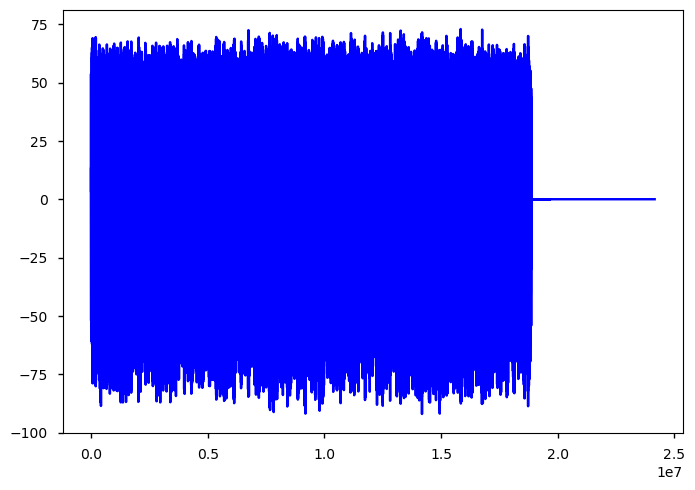

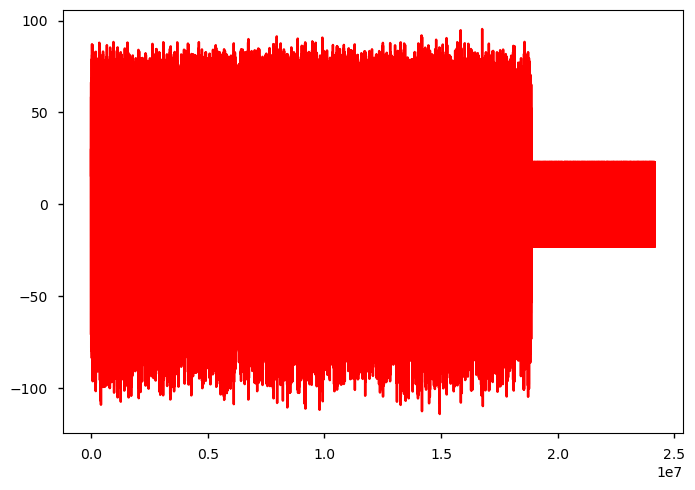

100%|█████████████████████████████████████████████████████████████████████████████| 4726/4726 [00:08<00:00, 541.05it/s]


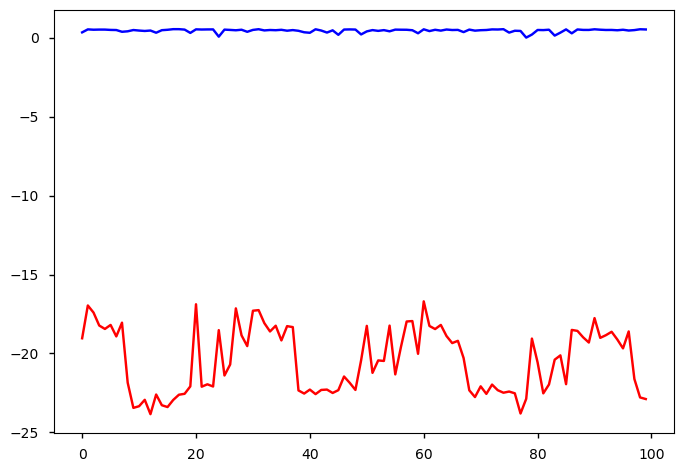

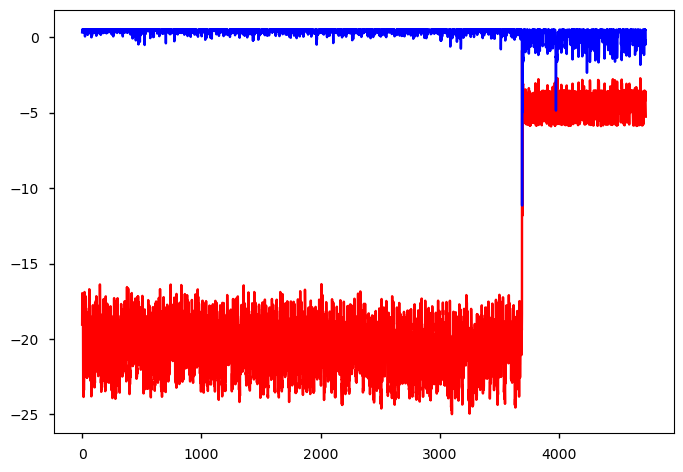

100%|██████████████████████████████████████████████████████████████████| 47962461/47962461 [05:29<00:00, 145770.74it/s]


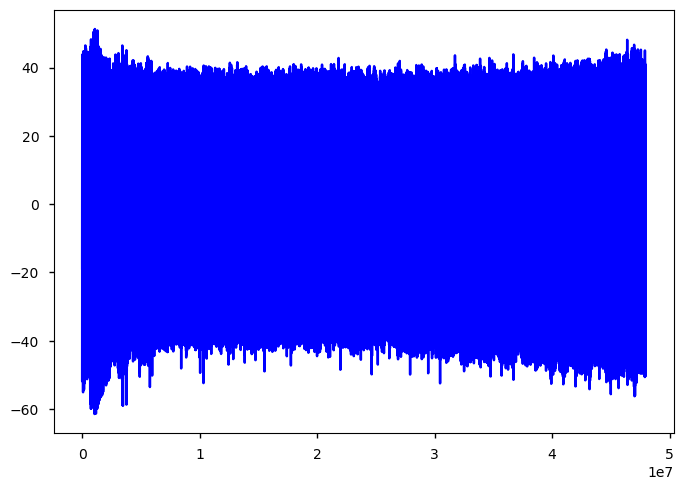

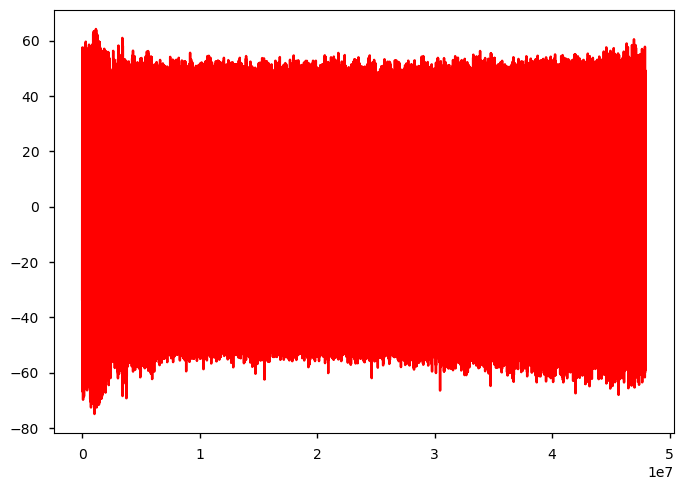

100%|█████████████████████████████████████████████████████████████████████████████| 9386/9386 [00:17<00:00, 532.39it/s]


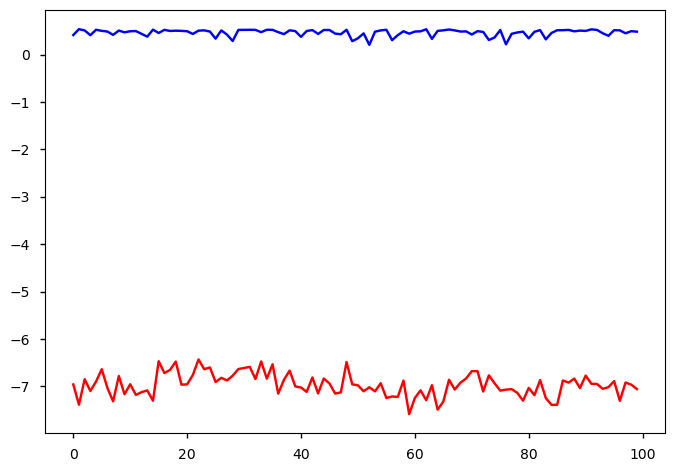

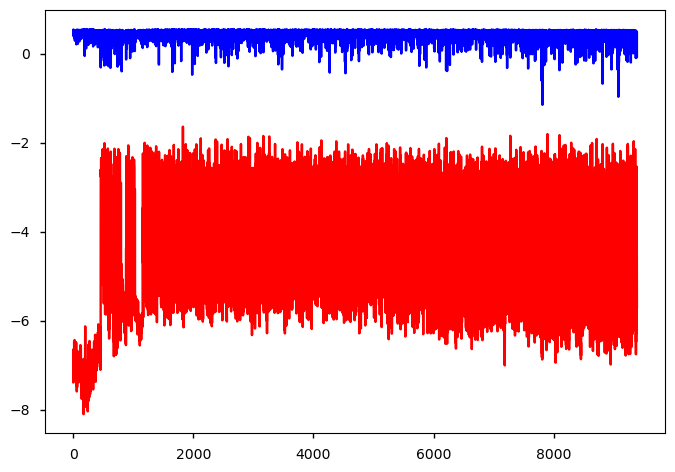

100%|██████████████████████████████████████████████████████████████████| 47962461/47962461 [05:27<00:00, 146450.31it/s]


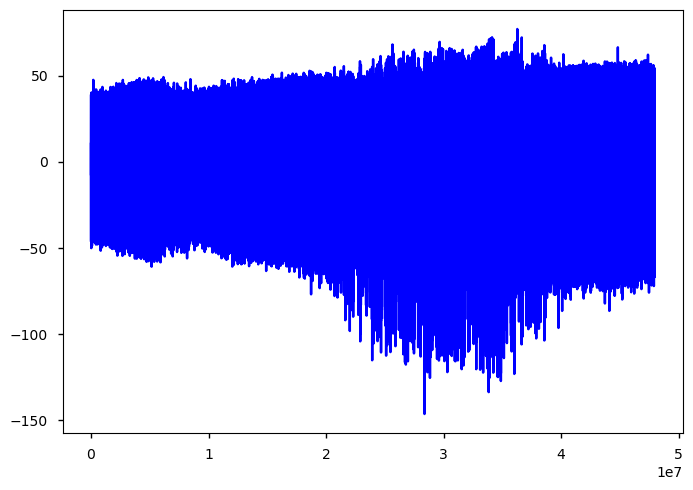

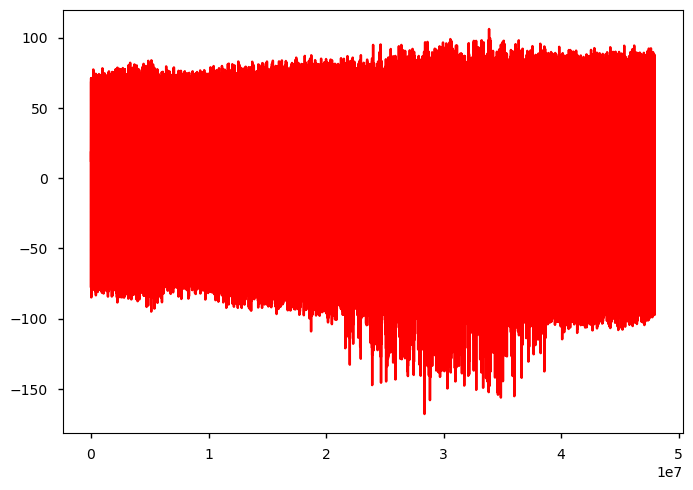

100%|█████████████████████████████████████████████████████████████████████████████| 9386/9386 [00:17<00:00, 538.74it/s]


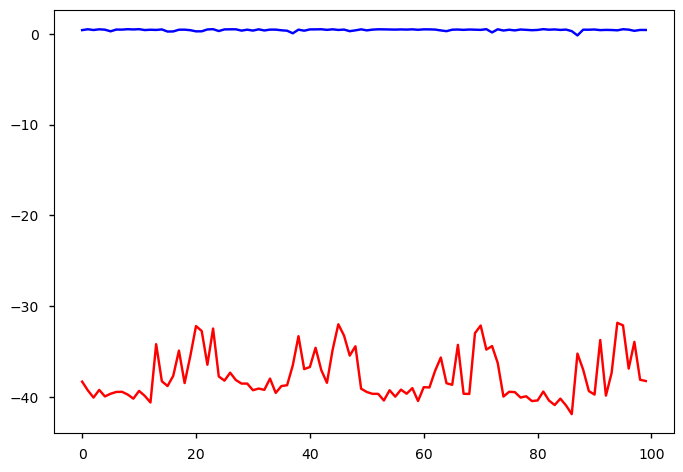

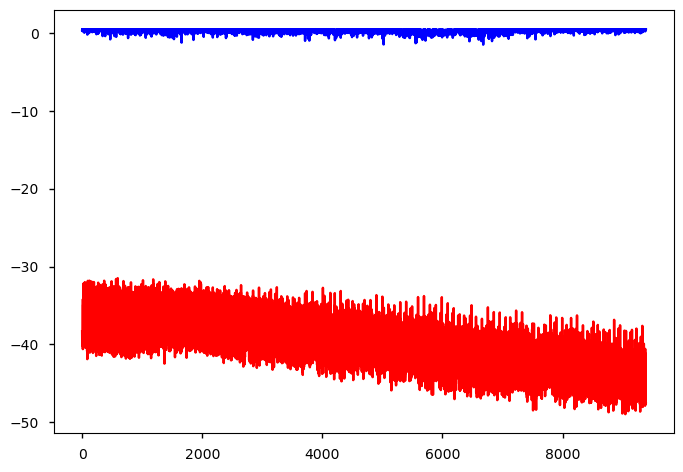

In [14]:
plt.show()
for valid in valid_arr:
    X_valid = pd.read_csv(valid, sep = '\t',
                     names = ['time', 'data'], header = None, encoding = 'CP949').iloc[:47962461,1]
    X_abnormal = get_abnormal_data(X_valid)
    plt.plot(X_valid.index,
             X_valid,
              color='blue', label="valid")
    plt.savefig('11features/pump/'+valid[6:-4] + ".png")
    plt.show()
    plt.clf()
    plt.close('all')
    
    plt.plot(X_abnormal.index,
             X_abnormal,
              color='red', label="abnormal")
    plt.savefig('11features/pump/'+valid[6:-4] + "_abnormal.png")
    plt.show()
    plt.clf()
    plt.close('all')
    
    
    X_valid = feature_process(X_valid)
    
    anomaly_scores = get_anomaly_scores(clf,X_valid)
    anomaly_scores = pd.DataFrame(anomaly_scores.reshape(-1) ,columns=['x1'])
    
    X_abnormal = feature_process(X_abnormal)
    outliers = get_anomaly_scores(clf,X_abnormal)
    outliers = pd.DataFrame(outliers.reshape(-1) ,columns=['x1'])

    plt.plot(outliers[:100].index,
     outliers[:100],
      color='red', label="anomaly")

    plt.plot(anomaly_scores[:100].index,
             anomaly_scores[:100],
              color='blue', label="normal")
    plt.savefig('11features/pump/pump_100result'+ valid[6:-10] + '_25.png')
    plt.show()
    plt.clf()
    plt.close('all')
    

    plt.plot(outliers.index,
     outliers,
      color='red', label="anomaly")

    plt.plot(anomaly_scores.index,
             anomaly_scores,
              color='blue', label="normal")
    plt.savefig('11features/pump/pump_result'+ valid[6:-10] + '_25.png')
    plt.show()
    plt.clf()
    plt.close('all')